In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [4]:
!pip install jsonlines

In [18]:
import jsonlines
import pandas as pd
from collections import defaultdict
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Чтение данных
data_file = '/content/parts/split_file_0.jsonl'
shingle_counts = defaultdict(int)
shingle_phishing_counts = defaultdict(int)

with jsonlines.open(data_file) as reader:
    for obj in reader:
        num = obj['num']
        target = obj['target']
        for shingle in obj['shingles']:
            shingle_counts[shingle] += num
            if target == 1:
                shingle_phishing_counts[shingle] += num

shingle_data = []
for shingle, count in shingle_counts.items():
    phishing_count = shingle_phishing_counts[shingle]
    phishing_ratio = phishing_count / count if count > 0 else 0
    group = int(phishing_ratio * 5)
    shingle_data.append((shingle, phishing_ratio, group))

<ipython-input-18-761cb625594d>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group'] = X['group'].astype('category')


In [ ]:
shingle_df = pd.DataFrame(shingle_data, columns=["shingle", "phishing_ratio", "group"])
X = shingle_df[['phishing_ratio', 'group']]
y = shingle_df['shingle'].apply(lambda x: 1 if x in shingle_phishing_counts and shingle_phishing_counts[x] > 0 else 0)
X['group'] = X['group'].astype('category')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = Pool(X_train, label=y_train, cat_features=[1])
test_data = Pool(X_test, label=y_test, cat_features=[1])

Epoch 1:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 0.9996
  F1 Score: 0.9998
Epoch 2:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 0.9996
  F1 Score: 0.9998
Epoch 3:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 0.9996
  F1 Score: 0.9998
Epoch 4:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 0.9996
  F1 Score: 0.9998
Epoch 5:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 0.9996
  F1 Score: 0.9998
Epoch 6:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 0.9996
  F1 Score: 0.9998
Epoch 7:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 0.9996
  F1 Score: 0.9998
Epoch 8:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 0.9996
  F1 Score: 0.9998
Epoch 9:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 0.9996
  F1 Score: 0.9998
Epoch 10:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 0.9996
  F1 Score: 0.9998
Epoch 11:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 0.9996
  F1 Score: 0.9998
Epoch 12:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 0.9996
  F1 Sco

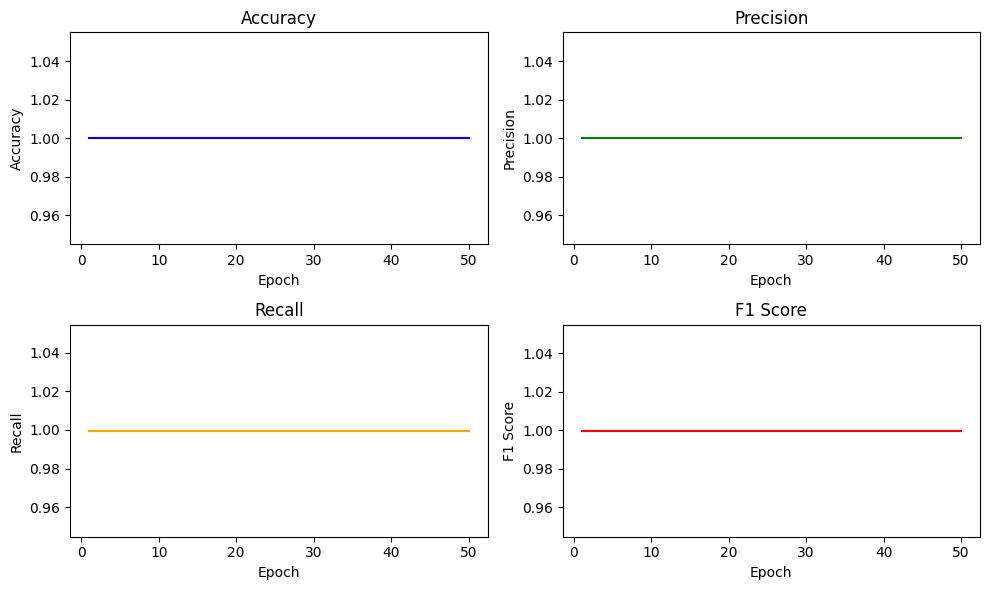

In [25]:
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracies = []
precisions = []
recalls = []
f1_scores = []

model = CatBoostClassifier(iterations=1, learning_rate=0.1, depth=6, cat_features=[1])

for epoch in range(50):
    model.fit(train_data, eval_set=test_data, verbose=False)

    y_pred = model.predict(X_test)

    y_pred_bin = (y_pred > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred_bin)
    precision = precision_score(y_test, y_pred_bin)
    recall = recall_score(y_test, y_pred_bin)
    f1 = f1_score(y_test, y_pred_bin)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f"Epoch {epoch + 1}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")

plt.figure(figsize=(10, 6))


# Точность
plt.subplot(2, 2, 1)
plt.plot(range(1, 51), accuracies, label="Accuracy", color='blue')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Precision
plt.subplot(2, 2, 2)
plt.plot(range(1, 51), precisions, label="Precision", color='green')
plt.title('Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')

# Recall
plt.subplot(2, 2, 3)
plt.plot(range(1, 51), recalls, label="Recall", color='orange')
plt.title('Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')

plt.subplot(2, 2, 4)
plt.plot(range(1, 51), f1_scores, label="F1 Score", color='red')
plt.title('F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()